# 9. DATA CLEANING

# 9.3. PARSING DATES

# 9.3.1. COURS

In [14]:
# modules we'll use
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

In [4]:
# read in our data
lanslides_path = 'C:/Users/PC Maison/4-KAGGLE/KAGGLE_DEV/KAGGLE_COURS_9-DATA_CLEANING/landslide-events/input/'
landslides = pd.read_csv(lanslides_path + 'catalog.csv')

In [5]:
# set seed for reproducibility
np.random.seed(0)

## 9.3.1.1. Check the data type of our date column

In [6]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [7]:
# print the first few rows of the date column
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


In [ ]:
# If you check the pandas dtype documentation here, you'll notice that 
# there's also a specific datetime64 dtypes. Because the dtype of our 
# column is object rather than datetime64, we can tell that Python doesn't 
# know that this column contains dates.

In [8]:
# check the data type of our date column
landslides['date'].dtype

dtype('O')

## 9.3.1.2. Convert our date columns to datetime

In [9]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], 
                                           format="%m/%d/%y")

In [10]:
# print the first few rows
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

## 9.3.1.3. Select the day of the month

In [11]:
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

## 9.3.1.4. Plot the day of the month to check the date parsing

C:\Users\Outils\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


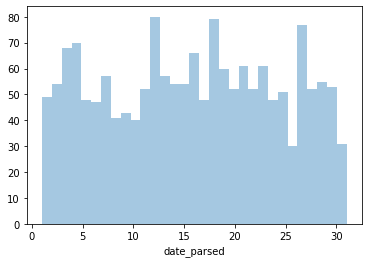

In [15]:
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)
plt.show()

# 9.3.2. EXERCICES

In [ ]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [ ]:
# read in our data
earthquakes_path = 'C:/Users/PC Maison/4-KAGGLE/KAGGLE_DEV/KAGGLE_COURS_9-DATA_CLEANING/earthquake-database/input/'
earthquakes = pd.read_csv(earthquakes_path + 'database.csv')

In [ ]:
# set seed for reproducibility
np.random.seed(0)

## 9.3.2.1.  Check the data type of our date column

In [22]:
earthquakes.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [23]:
print(earthquakes['Date'].head())

0    01/02/1965
1    01/04/1965
2    01/05/1965
3    01/08/1965
4    01/09/1965
Name: Date, dtype: object


## 9.3.2.2. Convert our date columns to datetime

In [24]:
earthquakes[3378:3383]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
3379,02/23/1975,03:53:36,-21.727,-71.356,Earthquake,33.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A0A,US,US,US,Reviewed
3380,02/23/1975,07:34:11,-10.879,166.667,Earthquake,33.0,NaN,NaN,5.5,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A0C,US,US,US,Reviewed
3381,02/25/1975,05:20:05,-7.388,149.798,Earthquake,33.0,NaN,NaN,5.5,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A12,US,US,US,Reviewed
3382,02/26/1975,04:48:55,85.047,97.969,Earthquake,33.0,NaN,NaN,5.6,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A1H,US,US,US,Reviewed


In [25]:
date_lengths = earthquakes.Date.str.len()
date_lengths.value_counts()

10    23409
24        3
Name: Date, dtype: int64

In [26]:
indices = np.where([date_lengths == 24])[1]
print('Indices with corrupted data:', indices)
earthquakes.loc[indices]

Indices with corrupted data: [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


In [27]:
# Traitement des dates incorrectes
earthquakes.loc[3378, "Date"] = "02/23/1975"
earthquakes.loc[7512, "Date"] = "04/28/1985"
earthquakes.loc[20650, "Date"] = "03/13/2011"

# conversion des dates en datetime
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format="%m/%d/%Y")

# 9.3.2.3. Select the day of the month

In [38]:
# try to get the day of the month from the date column
day_of_month_earthquakes = earthquakes['date_parsed'].dt.day

## 9.3.2.4. Plot the day of the month to check the date parsing

C:\Users\Outils\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


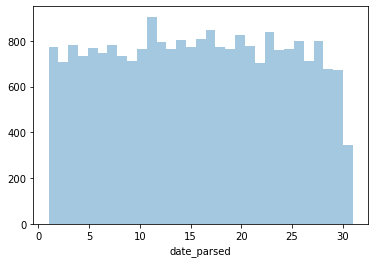

In [35]:
day_of_month_earthquakes = day_of_month_earthquakes.dropna()

# plot the day of the month
sns.distplot(day_of_month_earthquakes, kde=False, bins=31)
plt.show()